In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
track_bounds = pd.read_csv("outputs/track_bounds.csv", delimiter=";")
track_bounds

,# track_up_x,track_up_y,track_down_x,track_down_y,Unnamed: 4
0,5.9439,1.1353,-6.0561,1.1353,NaN
1,5.7719,4.1605,-6.2246,3.8675,NaN
2,5.5711,7.4721,-6.3916,6.5273,NaN
3,5.4242,10.3884,-6.5566,9.7113,NaN
4,5.4029,13.0361,-6.5964,13.1622,NaN
...,...,...,...,...,...
649,188.2542,266.9156,189.3721,278.8634,NaN
650,191.1233,266.6524,192.4770,278.5758,NaN
651,193.8229,266.5076,195.7871,278.3457,NaN
652,197.2309,265.9824,198.2885,277.9357,NaN


In [3]:
traj = pd.read_csv("outputs/traj_race_cl.csv", skiprows=2, delimiter=";")
traj 

,# s_m,x_m,y_m,psi_rad,kappa_radpm,vx_mps,ax_mps2
0,0.000000,-4.356113,1.135331,0.000000,-3.376733,20.429562,-2.768007
1,1.999010,-3.807181,2.813545,-0.368626,-0.011904,20.156896,-2.141240
2,3.998019,-2.991123,4.954581,-0.349384,0.012298,19.943413,-1.560377
3,5.997029,-2.335425,6.775895,-0.350551,-0.013319,19.786392,-0.316356
4,7.996038,-1.639443,8.604299,-0.376831,-0.013818,19.754405,0.032427
...,...,...,...,...,...,...,...
957,1913.052184,194.626328,276.483842,-1.673853,0.019667,24.536571,2.200133
958,1915.051194,196.278675,276.364777,-1.639617,-0.113780,24.715167,2.192903
959,1917.050204,198.500741,275.953779,-1.816506,-0.017319,24.891902,1.379589
960,1919.049213,200.993660,275.333060,-1.789972,0.046501,25.002448,-51.964584


In [4]:
track_cl = pd.read_csv("inputs/tracks/cs_track.csv", delimiter=",")
track_cl.head()

,# x_m,y_m,w_tr_right_m,w_tr_left_m
0,-0.054087,1.0615,6,6
1,-0.113650,2.1219,6,6
2,-0.177010,3.1814,6,6
3,-0.242500,4.2403,6,6
4,-0.308450,5.2989,6,6


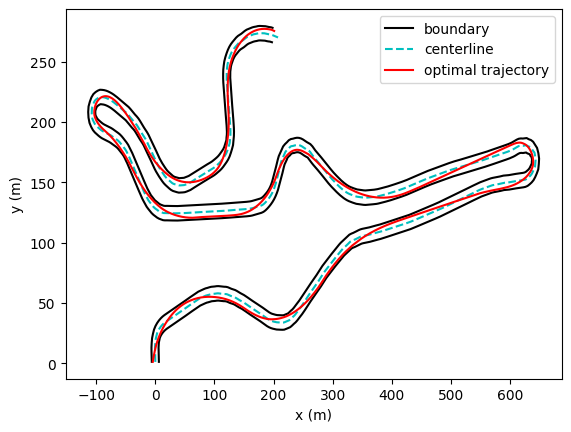

In [5]:
plt.plot(track_bounds["# track_up_x"].iloc[:-1] , track_bounds[" track_up_y"].iloc[:-1], "k", label="boundary")
plt.plot(track_bounds[" track_down_x"].iloc[:-1] , track_bounds[" track_down_y"].iloc[:-1], "k")
plt.plot(track_cl["# x_m"], track_cl["y_m"], "c--", label="centerline")
plt.plot(traj[" x_m"].iloc[:-1] , traj[" y_m"].iloc[:-1], "r", label = "optimal trajectory")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.savefig('optimal.png', dpi=500, bbox_inches='tight')

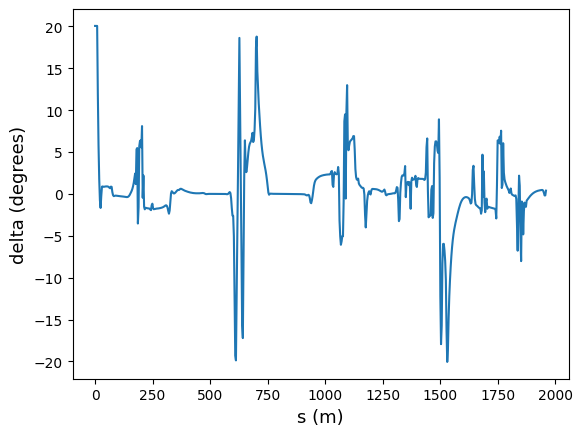

In [21]:
controls = pd.read_csv("outputs/mintime/controls.csv", delimiter=";")
plt.plot(controls["# s_m"],controls[" delta_rad"] * 180/np.pi)
plt.xlabel("s (m)", fontsize=13)
plt.ylabel("delta (degrees)", fontsize=13)
plt.savefig("plots/delta.png",  dpi=500, bbox_inches='tight')

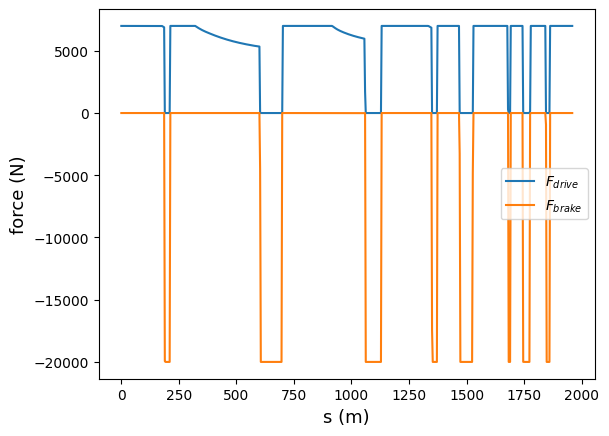

In [22]:
controls = pd.read_csv("outputs/mintime/controls.csv", delimiter=";")
plt.plot(controls["# s_m"],controls[" f_drive_N"] , label = "$F_{drive}$")
plt.plot(controls["# s_m"],controls[" f_brake_N"] , label = "$F_{brake}$")
plt.xlabel("s (m)", fontsize=13)
plt.ylabel("force (N)", fontsize=13)
plt.legend()
plt.savefig("plots/F.png",  dpi=500, bbox_inches='tight')

In [24]:
states = pd.read_csv("outputs/mintime/states.csv", delimiter=";")
states.head()

,# s_m,t_s,v_mps,beta_rad,omega_z_radps,n_m,xi_rad
0,0.0,0.000,20.43,1.27768,1.42787,4.18560,-1.57080
1,3.0,0.150,20.02,1.03559,1.30377,3.20754,-1.39994
2,6.0,0.311,19.78,0.79251,1.15895,1.96547,-1.22406
3,9.0,0.481,19.73,0.55843,0.97004,0.49690,-1.02582
4,12.0,0.649,19.89,0.36098,0.66443,-0.99936,-0.81718


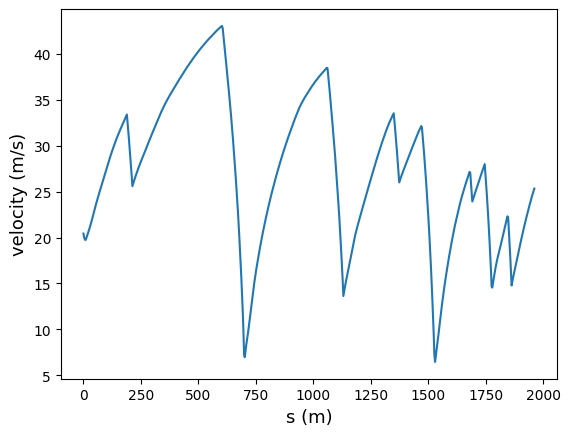

In [25]:
plt.plot(states["# s_m"],states[" v_mps"])
plt.xlabel("s (m)", fontsize=13)
plt.ylabel("velocity (m/s)",fontsize=13)
plt.savefig("plots/velocity.png",  dpi=500, bbox_inches='tight')

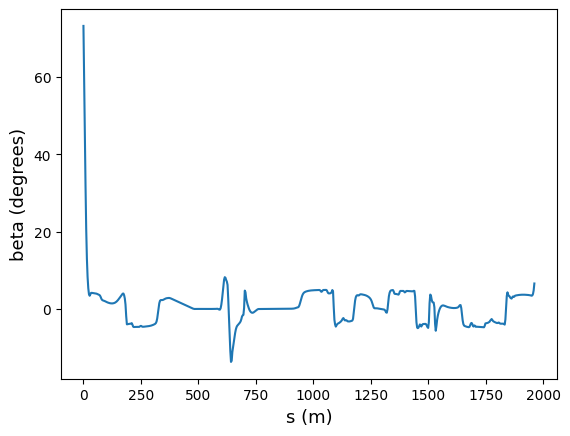

In [26]:
plt.plot(states["# s_m"],states[" beta_rad"] * 180/np.pi)
plt.xlabel("s (m)", fontsize=13)
plt.ylabel("beta (degrees)", fontsize=13)
plt.savefig("plots/beta.png",  dpi=500, bbox_inches='tight')

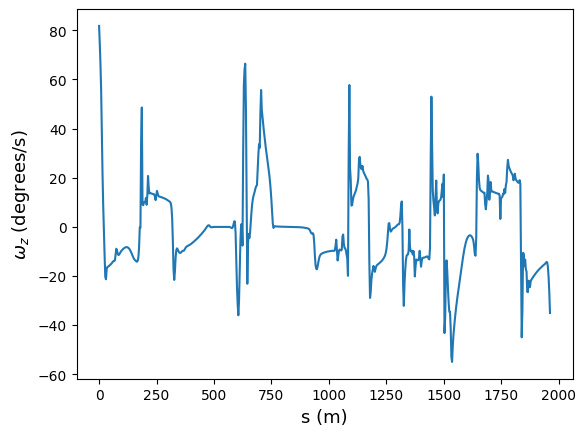

In [27]:
plt.plot(states["# s_m"],states[" omega_z_radps"] * 180/np.pi)
plt.xlabel("s (m)", fontsize=13)
plt.ylabel("$\omega_z$ (degrees/s)", fontsize=13)
plt.savefig("plots/omega_z.png",  dpi=500, bbox_inches='tight')